### Introduction: This is the Jupyter notebook to do the flowing things:

1. Read slimmed PKU Tree files, setup different tagger definition 
2. Load SFs from Lund Plane method, see the improvement of data/MC after applying SFs

kernel:HWW



### Import necessary modules

In [1]:
import numpy as np
import os
import pandas as pd
import random
import awkward as ak
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
from scipy import interpolate
# from sklearn.metrics import roc_curve, auc
from cycler import cycler
import uproot
# means uproot4
import ROOT
import argparse
import glob
import json
import logging
import os
import pickle as pkl
import warnings

import hist as hist2
import pyarrow
# import utils #local file: utils.py
import yaml
from typing import Dict, List, Union
from dataclasses import dataclass
from copy import deepcopy

# from coffea import hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.nanoevents.methods import vector
# from coffea.nanoevents.methods.vector import PtEtaPhiMLorentzVector

/data/pku/home/zhaoyz/anaconda3/envs/HWW/etc/cling/std.modulemap:257:29: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "memory_resource" [optional] {
                            ^
/data/pku/home/zhaoyz/anaconda3/envs/HWW/etc/cling/std.modulemap:447:27: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/chrono.h" [optional] {
                          ^
/data/pku/home/zhaoyz/anaconda3/envs/HWW/etc/cling/std.modulemap:531:41: warning: unknown attribute 'optional' [-Wignored-attributes]
  explicit module "bits_ranges_base_h" [optional] {
                                        ^
/data/pku/home/zhaoyz/anaconda3/envs/HWW/etc/cling/std.modulemap:538:32: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/ranges_util.h" [optional] {
                               ^
/data/pku/home/zhaoyz/anaconda3/envs/HWW/etc/cling/std.modulemap:559:40: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/uses_allo

Welcome to JupyROOT 6.28/04


### Read SlimmedTree files

In [2]:
MODE = "slimmedtree_validation"
# year = "2016"
# year = "2017"
# year = "2018"
year = "Full-Run2"
if MODE == "slimmedtree_validation":
    CustNanoData = {
        'data'        : "/data/bond/zhaoyz/SlimmedTree/V5/%s/Data/SlimmedTree_Data.root"%(year),
        'QCD'         : "/data/bond/zhaoyz/SlimmedTree/V5/%s/MC/SlimmedTree_QCD.root"%(year),          
        'WJets'       : "/data/bond/zhaoyz/SlimmedTree/V5/%s/MC/SlimmedTree_WJets.root"%(year),
        'Rest'        : "/data/bond/zhaoyz/SlimmedTree/V5/%s/ttbar_validation_final/Slimmed_Rest_ST.root"%(year),
        'TotalSignal' : "/data/bond/zhaoyz/SlimmedTree/V5/%s/Signal/SlimmedTree_Total.root"%(year),
        'ggF'         : "/data/bond/zhaoyz/SlimmedTree/V5/%s/Signal/SlimmedTree_GluGlu.root"%(year),
        'VH'          : "/data/bond/zhaoyz/SlimmedTree/V5/%s/Signal/SlimmedTree_VH.root"%(year),
        'ttH'         : "/data/bond/zhaoyz/SlimmedTree/V5/%s/Signal/SlimmedTree_ttH.root"%(year),
        'VBF'         : "/data/bond/zhaoyz/SlimmedTree/V5/%s/Signal/SlimmedTree_VBF.root"%(year),
        'ttbar_val'   : "/data/bond/zhaoyz/SlimmedTree/V5/%s/ttbar_validation_final/Slimmed_ttbar_validation.root"%(year),
    }
elif MODE == "tree_validation":
        CustNanoData = {
        'data'        : "/data/bond/zhaoyz/Tree/V8/%s/Merged/Data/Tree_Data.root"%(year),
        'QCD'         : "/data/bond/zhaoyz/Tree/V8/%s/Merged/MC/Tree_QCD.root"%(year),          
        'WJets'       : "/data/bond/zhaoyz/Tree/V8/%s/Merged/MC/Tree_WJets.root"%(year),
        'Rest'        : "/data/bond/zhaoyz/Tree/V8/%s/Merged/ttbar_validation_final/Rest_ST.root"%(year),
        'TotalSignal' : "/data/bond/zhaoyz/Tree/V8/%s/Merged/Signal/Tree_Total.root"%(year),
        'ggF'         : "/data/bond/zhaoyz/Tree/V8/%s/Merged/Signal/Tree_GluGlu.root"%(year),
        'VH'          : "/data/bond/zhaoyz/Tree/V8/%s/Merged/Signal/Tree_VH.root"%(year),
        'ttH'         : "/data/bond/zhaoyz/Tree/V8/%s/Merged/Signal/Tree_ttH.root"%(year),
        'VBF'         : "/data/bond/zhaoyz/Tree/V8/%s/Merged/Signal/Tree_VBF.root"%(year),
        'ttbar_val'   : "/data/bond/zhaoyz/Tree/V8/%s/Merged/ttbar_validation_final/ttbar_validation.root"%(year),
    }
else:
    CustNanoData = {
        'data'        : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Data/SlimmedTree_Data.root",
        'QCD'         : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/MC/SlimmedTree_QCD.root",          
        'Top'         : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/MC/SlimmedTree_Top.root",
        'WJets'       : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/MC/SlimmedTree_WJets.root",
        'Rest'        : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/MC/SlimmedTree_Rest.root",
        'TotalSignal' : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Signal/SlimmedTree_Total.root",
        'ggF'         : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Signal/SlimmedTree_GluGlu.root",
        'VH'          : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Signal/SlimmedTree_VH.root",   
        'ttH'         : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Signal/SlimmedTree_ttH.root",
        'VBF'         : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Signal/SlimmedTree_VBF.root",
    }    
BKG = ["QCD","Top","WJets","Rest"]
files = {typefile : {} for typefile in CustNanoData}
for typefile in CustNanoData:
    files[typefile] = uproot.lazy({CustNanoData[typefile]: "PKUTree" })

### Get DPhi in the events

In [3]:
def get_dphi(events):
    pT_higgs   = events["PTj_V2_a"]
    eta_higgs  = events["Etaj_V2_a"]
    phi_higgs  = events["Phij_V2_a"]
    mass_higgs = events["Mj_V2_a"]
    pT_MET = events["MET_et"]
    eta_MET = events["Etaj_V2_a"]
    phi_MET = events["MET_phi"]
    mass_MET = ak.zeros_like(events["MET_phi"])
    vec_higgs = ak.zip({
        "pt"   : pT_higgs   ,
        "eta"  : eta_higgs  ,
        "phi"  : phi_higgs  ,
        "mass" : mass_higgs ,
    },
    with_name="PtEtaPhiMLorentzVector",
    behavior=vector.behavior,
    )
    vec_MET = ak.zip({
        "pt"   :   pT_MET   ,
        "eta"  :  eta_MET  ,
        "phi"  :  phi_MET  ,
        "mass" : mass_MET ,
    },
    with_name="PtEtaPhiMLorentzVector",
    behavior=vector.behavior,
    )
    delta_phi = np.subtract(vec_MET.phi, vec_higgs.phi)
    delta_phi = np.where(delta_phi > np.pi, delta_phi - 2*np.pi, delta_phi)
    delta_phi = np.where(delta_phi < -np.pi, delta_phi + 2*np.pi, delta_phi)
    delta_phi = np.abs(delta_phi)
    print(delta_phi)
    events["DPhi"] = delta_phi

for k in files:
    print("Add dphi of:",k)
    get_dphi(events=files[k])

Add dphi of: data


[0.597, 0.363, 0.458, 1.07, 2.84, 0.341, ... 0.767, 0.2, 0.504, 3.03, 0.289, 0.0353]
Add dphi of: QCD
[2.8, 2.58, 0.514, 2.3, 3.01, 0.305, 0.629, ... 0.0396, 3.07, 0.765, 3, 2.96, 3.07]
Add dphi of: WJets
[2.81, 0.123, 1.6, 0.0544, 2.76, 2.51, ... 2.74, 0.508, 2.42, 1.41, 2.56, 0.258]
Add dphi of: Rest
[2.56, 1.73, 0.401, 3.13, 3.03, 2.83, ... 0.481, 1.58, 0.117, 0.0455, 3.02, 0.104]
Add dphi of: TotalSignal
[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]
Add dphi of: ggF
[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.09, 0.722, 3, 3.11, 3.07, 0.455]
Add dphi of: VH
[0.168, 1.39, 2.76, 1.26, 0.0118, 2.83, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]
Add dphi of: ttH
[3.12, 2.62, 2.28, 2.03, 0.0168, 0.16, ... 0.743, 0.839, 2.31, 2.44, 2.99, 0.506]
Add dphi of: VBF
[2.97, 2.31, 0.0849, 0.17, 0.0194, 0.481, ... 1.13, 0.332, 2.5, 2.82, 2.01, 2.45]
Add dphi of: ttbar_val
[0.995, 0.922, 3.01, 2.3, 0.567, 2.13, ... 1.84, 2.38, 0.918, 0.389, 2.49, 2.99]


### some test about variables

In [4]:
files["VBF"]["DPhi"]

<Array [2.97, 2.31, 0.0849, ... 2.01, 2.45] type='17017 * float32'>

### plot setting

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
from cycler import cycler

use_helvet = False ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

def flow(hist: bh.Histogram, overflow: bool=False, underflow: bool=False):
    h, var = hist.view(flow=(overflow | underflow)).value, hist.view(flow=(overflow | underflow)).variance
    if overflow: 
        # h, var also include underflow bins but in plots usually no underflow data
        # And we've filled None with -999, so we shouldn't show underflow data (mostly from filled None)
        # You have to access the overflow and underflow bins data like below:
        h[-2] += h[-1]; var[-2] += var[-1]
    if underflow:
        h[1] += h[0]; var[1] += var[0]
    if overflow or underflow:
        h, var = h[1:-1], var[1:-1]
    return h, var
    # Return the updated histogram and variance

def error_bar(h, var, type='data'):
    from scipy.interpolate import CubicSpline
    if type == 'data':
        number = h
    elif type == 'mc':  # h = k*N, var = k^2*N, std = k*sqrt(N)
        number = h**2 / var
    else:
        raise ValueError("type should be 'data' or 'mc'! ")
    center = range(11) # Number: 0-10
    up = np.array([1.84, 3.30, 4.64, 5.92, 7.16, 8.38, 9.58, 10.77, 11.95, 13.11, 14.27]) - center
    down = center - np.array([0, 0.17, 0.71, 1.37, 2.09, 2.84, 3.62, 4.42, 5.23, 6.06, 6.89])
    #cs means to create a CubicSpline object
    cs_up = CubicSpline(x=center, y=up)
    cs_down = CubicSpline(x=center, y=down)
    
    Garwood = (number>0)&(number<10)
    poison_error_bar = np.sqrt(number)
    up_error_bar = np.copy(poison_error_bar)
    down_error_bar = np.copy(poison_error_bar)
    up_error_bar[Garwood] = cs_up(number[Garwood])
    down_error_bar[Garwood] = cs_down(number[Garwood])
    if type == 'mc':
        up_error_bar *= var/h
        down_error_bar *= var/h
    up_error_bar [up_error_bar < 0 ] = 0
    down_error_bar [down_error_bar < 0 ] = 0
    return np.array([down_error_bar, up_error_bar])


# function to find the optimal region with S/sqrt(B)
# not used so far
def optimalcut(shist, bhist):
    n_bins = len(shist)
    best_lower = None
    best_upper = None
    best_s_sqrt_b = 0

    for lower in range(n_bins):
        for upper in range(lower+1, n_bins+1):
            s = np.sum(shist[lower:upper])
            b = np.sum(bhist[lower:upper])
            s_sqrt_b = s / np.sqrt(b + 1)

            if s_sqrt_b > best_s_sqrt_b:
                best_lower = lower
                best_upper = upper
                best_s_sqrt_b = s_sqrt_b

    return best_lower, best_upper, best_s_sqrt_b

### ttbar validation for Lund Plane calibration

1. We first separate different component
2. Then define different tagger to extract different jet types

In [6]:
#Select ttbar Top matched and unmatched events
files["TT tbqq matched"] = files["ttbar_val"][files["ttbar_val"]["t_a"] == 1]
files["TT tlqq matched"] = files["ttbar_val"][files["ttbar_val"]["tlqq_a"] == 1]
files["TT W matched"] = files["ttbar_val"][files["ttbar_val"]["w_a"] == 1]
files["TT Unmatched"] = files["ttbar_val"][(files["ttbar_val"]["t_a"] != 1) & (files["ttbar_val"]["tlqq_a"] != 1)& (files["ttbar_val"]["w_a"] != 1)]

In [7]:
top_tagger_label = [score for score in files["TT tbqq matched"].fields if score.startswith("a_Top")]

In [8]:
lvqq_tagger_label = [score for score in files["TT tbqq matched"].fields if (score.startswith("a_HWqqWtau")) or (score.startswith("a_HWqqWm")) or (score.startswith("a_HWqqWe")) ]
lvqq_tagger_label

['a_HWqqWmv0c',
 'a_HWqqWmv1c',
 'a_HWqqWtaumv0c',
 'a_HWqqWtaumv1c',
 'a_HWqqWev0c',
 'a_HWqqWtauev0c',
 'a_HWqqWev1c',
 'a_HWqqWtauev1c',
 'a_HWqqWtauhv1c',
 'a_HWqqWtauhv0c']

In [9]:
top_tagger_label

['a_TopbWev',
 'a_TopbWqq0c',
 'a_TopbWtaumv',
 'a_TopbWq1c',
 'a_TopbWtauhv',
 'a_TopbWq0c',
 'a_TopbWtauev',
 'a_TopbWqq1c',
 'a_TopbWmv']

In [10]:
def get_tagger_lvqq_vs_tbqq(events,vs_top = True):
    lvqq_tagger_label = [score for score in events.fields if (score.startswith("a_HWqqWtau")) or (score.startswith("a_HWqqWm")) or (score.startswith("a_HWqqWe")) ]
    lvqq_tagger_score = ak.zeros_like(events[lvqq_tagger_label[0]])
    for label in lvqq_tagger_label:
        # print(label)
        lvqq_tagger_score = lvqq_tagger_score + events[label]
    # print(top_tagger_score)
    top_tagger_label = [score for score in events.fields if score.startswith("a_Top")]
    top_tagger_score = ak.zeros_like(events[top_tagger_label[0]])
    for label in top_tagger_label:
        # print(label)
        top_tagger_score = top_tagger_score + events[label]
    # print(top_tagger_score)
    if vs_top == True:    
        tagger_lvqq_vs_tbqq = lvqq_tagger_score/(lvqq_tagger_score + top_tagger_score)
    else:
         tagger_lvqq_vs_tbqq = lvqq_tagger_score
    print(tagger_lvqq_vs_tbqq)
    events["tagger_lvqq_vs_tbqq"] = tagger_lvqq_vs_tbqq
for i in files:
    get_tagger_lvqq_vs_tbqq(files[i],vs_top = False) #means only add all the Hlvqq tagger scores
    print("done ",i)

[0.0199, 0.0275, 0.00293, 0.00516, 0.0645, ... 0.0032, 0.00504, 0.0725, 0.00126]
done  data
[0.0196, 0.000486, 0.00138, 0.0117, 0.168, ... 0.0148, 0.00232, 0.0217, 0.00411]
done  QCD
[0.00641, 0.0182, 0.00493, 0.0333, 0.246, ... 0.0241, 0.00383, 0.0265, 0.0573]
done  WJets
[0.00018, 0.00159, 0.00289, 0.00829, 0.0319, ... 0.0154, 0.0166, 0.0412, 0.434]
done  Rest
[0.00262, 0.0074, 0.0433, 0.000717, 0.00339, ... 0.0444, 0.0177, 0.0932, 0.0106]
done  TotalSignal
[0.00262, 0.0074, 0.0433, 0.000717, 0.00339, ... 0.0384, 0.00472, 0.0647, 0.00793]
done  ggF
[0.999, 0.0228, 0.00305, 0.927, 0.18, ... 0.00112, 0.0444, 0.0177, 0.0932, 0.0106]
done  VH
[0.513, 0.00532, 0.014, 0.00349, 0.00795, ... 0.0219, 0.000272, 0.00514, 0.00207]
done  ttH
[0.00742, 0.986, 0.989, 0.0289, 0.892, ... 0.302, 0.778, 0.999, 0.00591, 0.0126]
done  VBF
[0.0519, 0.195, 0.00498, 0.145, 0.0222, ... 0.0438, 0.014, 0.0341, 0.112, 0.0195]
done  ttbar_val
[0.195, 0.00498, 0.0152, 0.000816, 0.000377, ... 0.00519, 0.0543, 0.00

In [11]:
def get_tagger_wo_top(events):
    top_tagger_label = [score for score in events.fields if score.startswith("a_Top")]
    top_tagger_score = ak.zeros_like(events[top_tagger_label[0]])
    for label in top_tagger_label:
        # print(label)
        top_tagger_score = top_tagger_score + events[label]
    # print(top_tagger_score)
    tagger_score_wo_top = events["a_HWW_V2"]/(ak.ones_like(top_tagger_score)-top_tagger_score)
    print(tagger_score_wo_top)
    events["tagger_wo_top"] = tagger_score_wo_top
for i in files:
    get_tagger_wo_top(files[i]) #means we use HWW/(1- top scores)
    print("done ",i)

[0.184, 0.577, 0.0109, 0.296, 0.313, ... 0.114, 0.0565, 0.538, 0.263, 0.0425]
done  data
[0.581, 0.0235, 0.013, 0.325, 0.498, 0.019, ... 0.121, 0.123, 0.189, 0.0251, 0.025]
done  QCD
[0.0223, 0.0833, 0.0576, 0.764, 0.33, 0.101, ... 0.113, 0.808, 0.0426, 0.967, 0.0936]
done  WJets
[0.0118, 0.538, 0.0707, 0.0713, 0.118, ... 0.514, 0.854, 0.0289, 0.104, 0.483]
done  Rest
[0.077, 0.884, 0.716, 0.209, 0.134, 0.518, ... 0.923, 0.217, 0.877, 0.98, 0.0106]
done  TotalSignal
[0.077, 0.884, 0.716, 0.209, 0.134, 0.518, ... 0.334, 0.864, 0.11, 0.808, 0.966]
done  ggF
[1, 0.354, 0.59, 0.996, 0.229, 0.969, ... 0.996, 0.923, 0.217, 0.877, 0.98, 0.0106]
done  VH
[0.604, 0.281, 0.0727, 0.0992, 0.0876, 0.315, ... 0.556, 0.253, 0.0795, 0.785, 0.126]
done  ttH
[0.987, 1, 0.999, 0.836, 0.944, 0.993, 0.058, ... 0.953, 0.362, 0.998, 1, 0.97, 0.8]
done  VBF
[0.747, 0.639, 0.131, 0.252, 0.035, 0.084, ... 0.569, 0.0429, 0.937, 0.549, 0.142]
done  ttbar_val
[0.639, 0.131, 0.084, 0.992, 0.0373, 0.978, ... 0.459, 

### Signal contamination test:
here we also plot the signal contamination 

In [17]:
from matplotlib.cm import get_cmap
hep.style.use("CMS")
def conta_plot(arrays, weight, plot_name: str, x_name: str, region = 'PS',othertext = "", year='2017', bins=40, x_min=0, x_max=2000, density=False, overflow=False, underflow=False, fraction_log=False,log = False,blind = False, blindMC = False, nametext = "",postfit_files = "",SF = None, sample = None):
    LUMI = {"2016pre": 19.52, "2016post": 16.81,"2016":36.33, "2017": 41.48, "2018": 59.83,"Full-Run2":138}
    bin_width = (x_max-x_min)/bins
    if blind:
        mask = np.logical_or(arrays["data"] <= 80, arrays["data"] >= 160)
        arrays["data"] = arrays["data"][mask]
        if blindMC:
            pass
    ## canvas initializing
    f = plt.figure(figsize=(9, 10))
    gs = mpl.gridspec.GridSpec(3, 1, height_ratios=[6, 1, 1], hspace=0.08)
    ax = f.add_subplot(gs[0])
    plt.grid()
    hep.cms.label(loc = 1, data=True, year=year, ax=ax, lumi=LUMI[year], fontsize=18, llabel='Preliminary')
    # Ratio panel
    ax1 = f.add_subplot(gs[1])
    ax2 = f.add_subplot(gs[2])
    ax1.grid()
    ax2.grid()    
    # analyze
    stacked = {'h': {}, 'var': {}} 
    individual = {'h': {}, 'var': {}}
    BKG = ["QCD","TT tbqq matched","TT W matched","TT tlqq matched","TT Unmatched","WJets","Rest"]
    for (k,v) in arrays.items():
        print("k,v = ",(k,v))
        hist = bh.Histogram(bh.axis.Regular(bins, x_min, x_max), storage=bh.storage.Weight())
        values = ak.fill_none(v, -999)
        if k!='data':
            hist.fill(values, weight=weight[k])
        else:
            hist.fill(values)
        h, var = flow(hist=hist, overflow=overflow, underflow=underflow)
        print(h)
        if SF and sample == "tbqq":
            if k == "TT tbqq matched": 
                for i in range(len(h)):
                    h[i] = h[i]*SF[i] 
        if SF and sample == "tlqq":
            if k == "TT tlqq matched": 
                for i in range(len(h)):
                    print("xxx")
                    h[i] = h[i]*SF[i] 
        # here the var are just usual standard variance
        if k in BKG: 
            stacked['h'][k] = h
            stacked['var'][k] = var
        else:
            individual['h'][k] = h
            individual['var'][k] = var        
    #plot
    SIG_COLOR={'TotalSignal': 'black',"ggF":"#FF69B4","VH":"blue","ttH":"#FFD700","VBF":"aqua"}
    ax1.plot([x_min,x_max], [1,1], color='black', linestyle='dashed')
    if len(stacked['h'].keys())>0:
        BKG_list = ["Rest","WJets","TT W matched","TT tbqq matched","TT tlqq matched","TT Unmatched","QCD"]
        err_list = [  np.nan_to_num(error_bar(stacked['h'][k], stacked['var'][k], type = "mc"), nan = 0) for k in BKG_list]
        h_list = [stacked['h'][k] for k in BKG_list]
        label_list = BKG_list
        colors = ["#1f77b4","#00ffff", "#ff7f0e", "#2ca02c","#ffff00","#800080","#d62728"]
        hep.histplot(h_list, bins=hist.axes[0].edges, label=label_list, yerr = err_list, histtype='fill', density=density, stack=True, linewidth=2, ax=ax,color = colors)
        bkg_h = np.sum(list(stacked['h'].values()), axis=0)
        bkg_err = np.sum(err_list ,  axis=0)
        bin_edges = np.linspace(x_min, x_max, bins+1)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        #test:
        print("total error:",bkg_err)
        ax.errorbar(x = bin_centers,y = bkg_h, yerr=bkg_err, fmt='none', color='gray', capsize=2,markersize = 3)
    # Scale the signal according to total BKG to make it visiable:
    NORM_s1=np.sum(bkg_h)/(np.sum(individual["h"]["TotalSignal"])+0.000001);
    print("Should scale signal * ",NORM_s1)
    if                       NORM_s1>=300000: NORM_s1=300000
    elif  300000>NORM_s1 and NORM_s1>=100000: NORM_s1= 100000
    elif  100000>NORM_s1 and NORM_s1>= 30000: NORM_s1= 30000
    elif   30000>NORM_s1 and NORM_s1>= 10000: NORM_s1=  10000
    elif   10000>NORM_s1 and NORM_s1>=  3000: NORM_s1=  3000
    elif    3000>NORM_s1 and NORM_s1>=  1000: NORM_s1=   1000
    elif    1000>NORM_s1 and NORM_s1>=   300: NORM_s1=   300
    elif     300>NORM_s1 and NORM_s1>=   100: NORM_s1=    100
    elif     100>NORM_s1 and NORM_s1>=    30: NORM_s1=    30
    elif      30>NORM_s1 and NORM_s1>=    10: NORM_s1=     10
    else                                    : NORM_s1=     1   
    for (k,h) in individual['h'].items():
        if k=='data': #data
            err = error_bar(h, individual['var'][k], type='data')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, color='black', histtype='errorbar', density=density, stack=False, ax=ax)
            ratio_error = np.sqrt(np.power(err/h,2) + np.power(bkg_err/bkg_h,2))
            hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=ratio_error, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)    
            data_mc_ratio = np.sum(h)/np.sum(bkg_h)
        else:  # signal
            err = error_bar(h, individual['var'][k], type='mc')
            hep.histplot(h*NORM_s1, bins=hist.axes[0].edges, yerr=NORM_s1*err, label=k+r"$\times$"+str(NORM_s1), histtype='step', density=density, stack=False, linewidth=2, ax=ax, color=SIG_COLOR[k])
            y = h / np.sqrt(bkg_h + 1)
            hep.histplot(y, bins=hist.axes[0].edges, yerr=err/np.sqrt(bkg_h+1), label=k, histtype='step', density=density, stack=False, ax=ax2, color=SIG_COLOR[k])
            if k == "TotalSignal":
                best_lower, best_upper, best_s_sqrt_b = optimalcut(h,bkg_h)
                print("Optimal cut =",best_lower, best_upper, best_s_sqrt_b) # todo
    ax.set_xlim(x_min, x_max)
    if log:
        ax.set_yscale('log')
        # ax.set_ylim(0.01 if not density else 0, ax.get_ylim()[1]*(1e3 if not density else 1.2))
    else:
        ax.set_ylim(0.01 if not density else 0, ax.get_ylim()[1]*1.3)
    # if not density:
    #     ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='x', which='major', labelsize=0)
    if density==False:
        ax.set_ylabel('Events', fontsize=20, ha='right', y=1)
    elif density==True:    
        ax.set_ylabel('A.U.', fontsize=20, ha='right', y=1)
    ax1.set_xlim(x_min, x_max)
    ax1.set_xticklabels([])
    if fraction_log:
        ax1.set_ylim(1e-1, 1e1)
        ax1.set_yscale('log')
    else:
        # ax1.set_ylim(0, 3) #ratio 0-2
        ax1.set_ylim(0.5, 1.5)
    ax1.set_ylabel(r'$\frac{Data}{bkg\ MC}$', ha='center', fontsize=24)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(0, ax2.get_ylim()[1]*1.2)
    ax2.tick_params(axis='both', which='major', labelsize=16)
    ax2.set_xlabel(x_name, fontsize=22, ha='right', x=1)
    ax2.set_ylabel(r'$S/\sqrt{B+1}$', ha='center', fontsize=16)
    ax2.ticklabel_format(useOffset=False, style='plain')
    ax2.tick_params(axis='both', which='major', labelsize=16)
    plt.xticks(size=14)
    plt.yticks(size=14)
    if blind:
        plt.text(0.05,0.83,region + " " + othertext + " blinded",fontsize=17, color="black", ha='left',transform=ax.transAxes)
    else:
        plt.text(0.05,0.83,othertext + " Data/MC = " + str(round(data_mc_ratio,3)),fontsize=14, color="black", ha='left',transform=ax.transAxes)        
    ax.legend(loc="upper right", ncol=2, frameon=False, fontsize=13)
    suffix = '_AU' if density else ''
    path_str = './plots/validation/22Mar2024'
    if not os.path.exists(path_str):
        os.makedirs(path_str)
    plt.savefig(f"{path_str}/{year}_{plot_name}{suffix}_{region}_{nametext}.pdf", bbox_inches='tight')
    plt.show()

In [13]:
SFs_tbqq = [1.039,1.041,1.047,1.060,1.074,1.077,1.074,1.067]
SFs_tlqq = [0.842,1.128,0.875,1.003,0.852,1.020,0.911,0.809]

In [22]:
def conta_runPlots(region = "PS", events = files,othertext = "", blind = False, postfit_files = "",log = True,SFed = None):
    weight={k: events[k][CUT[region][k]]["weight"] for k in events if k != "ttbar_val"}
    if not SFed == None:   
        if "tbqq" in region: conta_plot(arrays = {k: events[k][CUT[region][k]]["tagger_wo_top"] for k in events if k != "ttbar_val"},  region = region, othertext = othertext, plot_name='HWWwithoutTop', x_name=r'$jet_{a}:HWW\ score(without\ P_{top}\ in\ denominator)$', x_max=1, x_min=0.6, bins=8, weight =weight, year="Full-Run2",blind = blind, blindMC = False,postfit_files = postfit_files,log = log,SF = SFs_tbqq,sample = "tbqq")
        if "tlqq" in region: conta_plot(arrays = {k: events[k][CUT[region][k]]["tagger_lvqq_vs_tbqq"] for k in events if k != "ttbar_val"},  region = region, othertext = othertext, plot_name='Hlvqq', x_name=r'$jet_{a}:Hlvqq\ score$', x_max=1, x_min=0.6, bins=8, weight =weight, year="Full-Run2",blind = blind, blindMC = False,postfit_files = postfit_files,log = log, SF = SFs_tlqq, sample = "tlqq")
    else:
        if "tbqq" in region: conta_plot(arrays = {k: events[k][CUT[region][k]]["tagger_wo_top"] for k in events if k != "ttbar_val"},  region = region, othertext = othertext, plot_name='HWWwithoutTop', x_name=r'$jet_{a}:HWW\ score(without\ P_{top}\ in\ denominator)$', x_max=1, x_min=0.6, bins=8, weight =weight, year="Full-Run2",blind = blind, blindMC = False,postfit_files = postfit_files,log = log,SF = None,sample = "tbqq")
        if "tlqq" in region: conta_plot(arrays = {k: events[k][CUT[region][k]]["tagger_lvqq_vs_tbqq"] for k in events if k != "ttbar_val"},  region = region, othertext = othertext, plot_name='Hlvqq', x_name=r'$jet_{a}:Hlvqq\ score$', x_max=1, x_min=0.6, bins=8, weight =weight, year="Full-Run2",blind = blind, blindMC = False,postfit_files = postfit_files,log = log, SF = None, sample = "tlqq")        

In [19]:
CUT = {  
        "tlqq_SFed" : {k: (files[k]["DPhi"] <= 0.6) & (files[k]["nb_t_deep_in"] >= 1) & (files[k]["Mj_V2_a"] >= 125) & (files[k]["Mj_V2_a"] <= 225) & (files[k]["PTj_V2_a"] > 400) & (files[k]["MET_et"]/files[k]["PTj_V2_a"] >= 0.4) for k in files if k != "ttbar_val"},
        "tbqq_SFed" : {k: (files[k]["DPhi"] >= 2) & (files[k]["nb_t_deep_in"] >= 1) & (files[k]["Mj_V2_a"] >= 125) & (files[k]["Mj_V2_a"] <= 225) & (files[k]["PTj_V2_a"] > 400) & (files[k]["MET_et"]/files[k]["PTj_V2_a"] >= 0.4) for k in files if k != "ttbar_val"},
        "tlqq" : {k: (files[k]["DPhi"] <= 0.6) & (files[k]["nb_t_deep_in"] >= 1) & (files[k]["Mj_V2_a"] >= 125) & (files[k]["Mj_V2_a"] <= 225) & (files[k]["PTj_V2_a"] > 400) & (files[k]["MET_et"]/files[k]["PTj_V2_a"] >= 0.4) for k in files if k != "ttbar_val"},
        "tbqq" : {k: (files[k]["DPhi"] >= 2.0) & (files[k]["nb_t_deep_in"] >= 1) & (files[k]["Mj_V2_a"] >= 125) & (files[k]["Mj_V2_a"] <= 225) & (files[k]["PTj_V2_a"] > 400) & (files[k]["MET_et"]/files[k]["PTj_V2_a"] >= 0.4) for k in files if k != "ttbar_val"},
    }

### First plot the distribution without SFs

k,v =  ('data', <Array [0.0384, 0.000532, ... 0.00677, 0.00951] type='6553 * float32'>)
[17. 15. 15. 18. 17. 18. 18. 24.]
k,v =  ('QCD', <Array [0.000614, 0.000424, ... 0.143, 0.00433] type='8971 * float32'>)
[9.51304253 3.29539972 9.4507996  0.7673301  1.16693955 0.14870657
 0.85949365 0.        ]
k,v =  ('WJets', <Array [0.0524, 0.00128, ... 0.000768, 0.0166] type='6117 * float32'>)
[1.17424146 1.04635546 1.04814849 1.05610528 1.50387687 1.43889281
 2.07105705 2.4559681 ]
k,v =  ('Rest', <Array [0.0115, 0.00749, ... 0.0214, 0.2] type='3649 * float32'>)
[0.77463091 1.31332705 1.44910191 0.50671111 1.24242739 1.828847
 2.80151886 3.85518834]
k,v =  ('TotalSignal', <Array [0.447, 0.28, ... 0.00139, 0.00919] type='1493 * float32'>)
[0.02440358 0.04959073 0.02484644 0.03450807 0.03957354 0.06218248
 0.07602102 0.12093574]
k,v =  ('ggF', <Array [0.669, 0.0541, 0.665, 0.017] type='4 * float32'>)
[0.         0.01454291 0.         0.         0.         0.
 0.         0.        ]
k,v =  ('VH',

/tmp/ipykernel_548835/2123724067.py:34: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_548835/2123724067.py:51: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:52: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:34: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_548835/2123724067.py:51: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:52: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:34: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_548835/2123724067.py:51: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:52: RuntimeWarning: invalid value enco

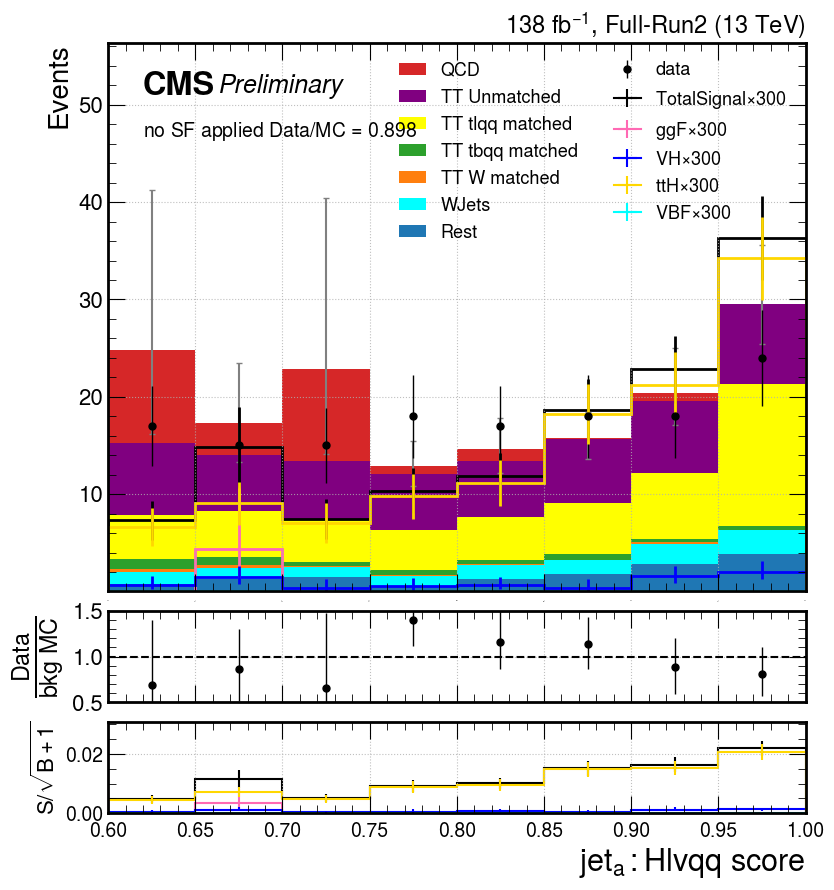

k,v =  ('data', <Array [0.218, 0.031, 0.447, ... 0.122, 0.0331] type='19999 * float32'>)
[431. 432. 378. 375. 356. 326. 282. 248.]
k,v =  ('QCD', <Array [0.125, 0.012, 0.42, ... 0.0583, 0.702] type='9689 * float32'>)
[139.10280416 138.18281322 132.94422882  77.02377316  98.15996752
  94.98417105  89.02601694  40.2298989 ]
k,v =  ('WJets', <Array [0.0671, 0.0346, ... 0.0555, 0.0668] type='7489 * float32'>)
[4.56831188 5.30417797 5.33978555 4.56133969 6.44972794 4.91066326
 5.08199742 3.62500429]
k,v =  ('Rest', <Array [0.0672, 0.0451, ... 0.182, 0.688] type='18532 * float32'>)
[21.0424222  16.53745014 17.61144674 13.89087286 12.74381321 13.49226827
 17.03485923 14.47809404]
k,v =  ('TotalSignal', <Array [0.183, 0.957, 0.68, ... 0.994, 0.0423] type='4405 * float32'>)
[0.2344614  0.2177057  0.23670576 0.23240535 0.32278046 0.35366807
 0.4848645  0.855649  ]
k,v =  ('ggF', <Array [0.183, 0.0482, 0.92, ... 0.0301, 0.164] type='10 * float32'>)
[0.         0.         0.         0.         0. 

/tmp/ipykernel_548835/2123724067.py:34: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_548835/2123724067.py:51: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:52: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:34: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_548835/2123724067.py:51: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:52: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/home/pku/zhaoyz/anaconda3/envs/HWW/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/pku/zhaoyz/anaconda3/envs/HWW/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis enc

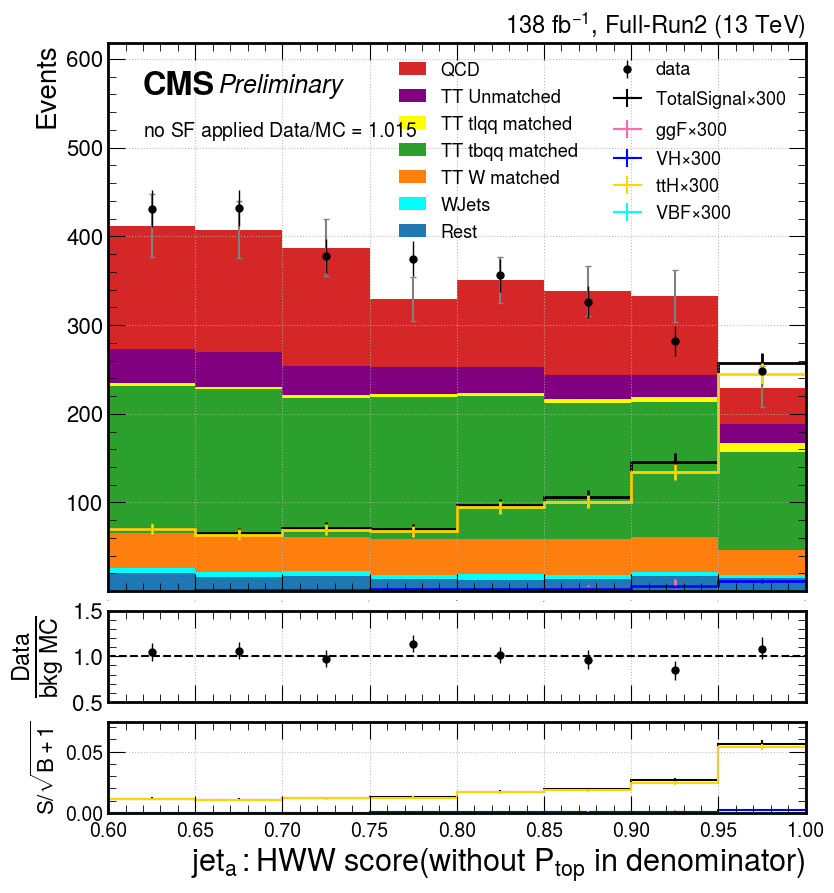

In [20]:
conta_runPlots(region = "tlqq", othertext = r"$no\ SF\ applied$",log = False)
conta_runPlots(region = "tbqq", othertext = r"$no\ SF\ applied$",log = False)

### Then plot the distribution with SF applied

k,v =  ('data', <Array [0.0384, 0.000532, ... 0.00677, 0.00951] type='6553 * float32'>)
[17. 15. 15. 18. 17. 18. 18. 24.]
k,v =  ('QCD', <Array [0.000614, 0.000424, ... 0.143, 0.00433] type='8971 * float32'>)
[9.51304253 3.29539972 9.4507996  0.7673301  1.16693955 0.14870657
 0.85949365 0.        ]
k,v =  ('WJets', <Array [0.0524, 0.00128, ... 0.000768, 0.0166] type='6117 * float32'>)
[1.17424146 1.04635546 1.04814849 1.05610528 1.50387687 1.43889281
 2.07105705 2.4559681 ]
k,v =  ('Rest', <Array [0.0115, 0.00749, ... 0.0214, 0.2] type='3649 * float32'>)
[0.77463091 1.31332705 1.44910191 0.50671111 1.24242739 1.828847
 2.80151886 3.85518834]
k,v =  ('TotalSignal', <Array [0.447, 0.28, ... 0.00139, 0.00919] type='1493 * float32'>)
[0.02440358 0.04959073 0.02484644 0.03450807 0.03957354 0.06218248
 0.07602102 0.12093574]
k,v =  ('ggF', <Array [0.669, 0.0541, 0.665, 0.017] type='4 * float32'>)
[0.         0.01454291 0.         0.         0.         0.
 0.         0.        ]
k,v =  ('VH',

/tmp/ipykernel_548835/2123724067.py:34: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_548835/2123724067.py:51: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:52: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:34: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_548835/2123724067.py:51: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:52: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:34: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_548835/2123724067.py:51: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:52: RuntimeWarning: invalid value enco

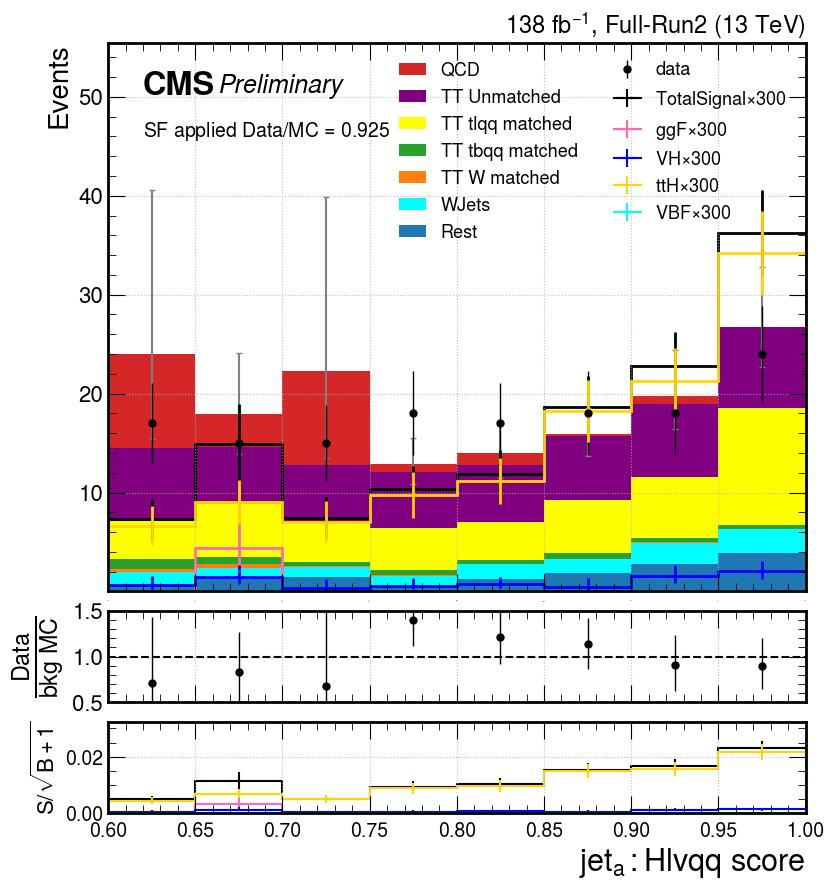

k,v =  ('data', <Array [0.218, 0.031, 0.447, ... 0.122, 0.0331] type='19999 * float32'>)
[431. 432. 378. 375. 356. 326. 282. 248.]
k,v =  ('QCD', <Array [0.125, 0.012, 0.42, ... 0.0583, 0.702] type='9689 * float32'>)
[139.10280416 138.18281322 132.94422882  77.02377316  98.15996752
  94.98417105  89.02601694  40.2298989 ]
k,v =  ('WJets', <Array [0.0671, 0.0346, ... 0.0555, 0.0668] type='7489 * float32'>)
[4.56831188 5.30417797 5.33978555 4.56133969 6.44972794 4.91066326
 5.08199742 3.62500429]
k,v =  ('Rest', <Array [0.0672, 0.0451, ... 0.182, 0.688] type='18532 * float32'>)
[21.0424222  16.53745014 17.61144674 13.89087286 12.74381321 13.49226827
 17.03485923 14.47809404]
k,v =  ('TotalSignal', <Array [0.183, 0.957, 0.68, ... 0.994, 0.0423] type='4405 * float32'>)
[0.2344614  0.2177057  0.23670576 0.23240535 0.32278046 0.35366807
 0.4848645  0.855649  ]
k,v =  ('ggF', <Array [0.183, 0.0482, 0.92, ... 0.0301, 0.164] type='10 * float32'>)
[0.         0.         0.         0.         0. 

/tmp/ipykernel_548835/2123724067.py:34: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_548835/2123724067.py:51: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:52: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:34: RuntimeWarning: invalid value encountered in divide
  number = h**2 / var
/tmp/ipykernel_548835/2123724067.py:51: RuntimeWarning: invalid value encountered in divide
  up_error_bar *= var/h
/tmp/ipykernel_548835/2123724067.py:52: RuntimeWarning: invalid value encountered in divide
  down_error_bar *= var/h
/home/pku/zhaoyz/anaconda3/envs/HWW/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/pku/zhaoyz/anaconda3/envs/HWW/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis enc

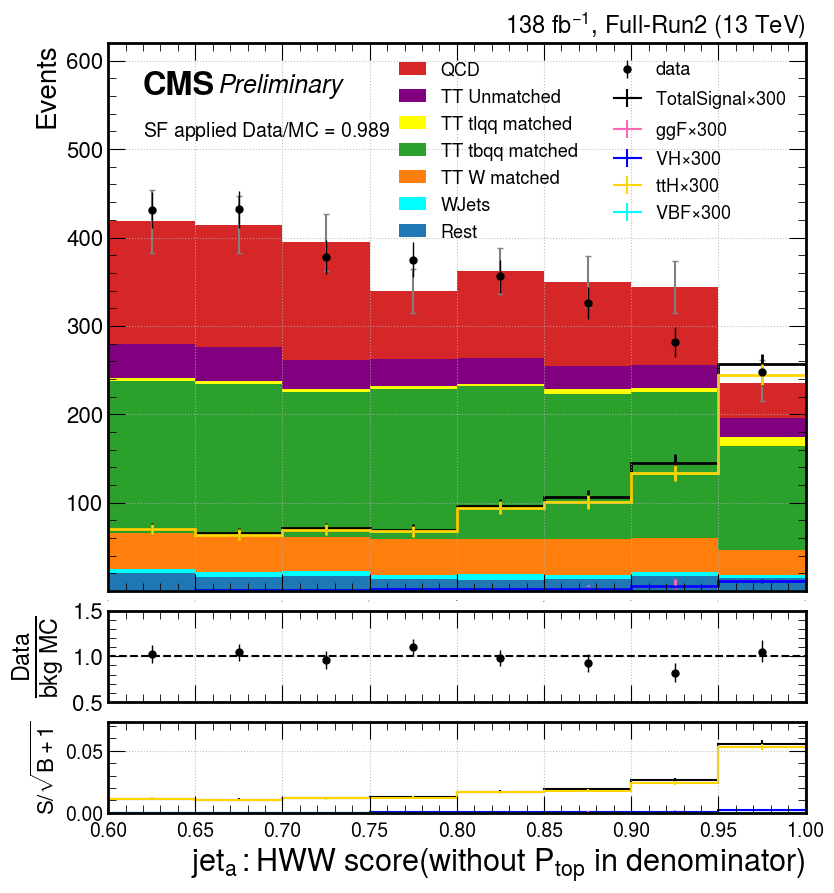

In [23]:
conta_runPlots(region = "tlqq_SFed", othertext = r"$SF\ applied$",log = False, SFed = True)
conta_runPlots(region = "tbqq_SFed", othertext = r"$SF\ applied$",log = False, SFed = True)

### some other test